<a href="https://colab.research.google.com/github/aamfoko1/Jax_BDSCi_2025/blob/readme_edit_riley/JAX_Project_Riley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# typical Data Cleaning stack
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# Import seaborn and apply its plotting styles
import seaborn as sns

# Statmodels & patsy
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import pearsonr, norm, ttest_ind, skewnorm

In [91]:
# we chose new jersey because it had the most data points in the interactive map that we found
#aka new jersey had the most data in our data set
df1 = pd.read_csv('/content/pcbs.csv') #open file
df1
print(df1.shape)
print(df1.isnull().sum()) #see which columns have no data sections
print("------------------------")
#print(df1.info()) #inspect data? not sure if i gained anything from this
print("=======================")

(1207, 181)
Org_Identifier                   0
Org_FormalName                   0
Project_Identifier               0
Project_Name                  1207
Project_QAPPApproved          1207
                              ... 
Result_CharacteristicGroup       0
Org_Type                         0
LastChangeDate                   0
USGSpcode                        0
USGSSampleAquifer             1207
Length: 181, dtype: int64
------------------------


In [92]:
df1_drop=df1.dropna(axis=1, how="all") #create new place for the data and drop all columns with no data inputted
print(df1_drop) #checking how the data looks
print (df1_drop.shape) #checking how many columns were dropped/ still here
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df1_drop.info())

     Org_Identifier          Org_FormalName  \
0              USGS  U.S. Geological Survey   
1              USGS  U.S. Geological Survey   
2              USGS  U.S. Geological Survey   
3              USGS  U.S. Geological Survey   
4              USGS  U.S. Geological Survey   
...             ...                     ...   
1202           USGS  U.S. Geological Survey   
1203           USGS  U.S. Geological Survey   
1204           USGS  U.S. Geological Survey   
1205           USGS  U.S. Geological Survey   
1206           USGS  U.S. Geological Survey   

                                     Project_Identifier   Location_Identifier  \
0                                              ["USGS"]  USGS-394710075210701   
1     ["NAWQA - National Water-Quality Assessment","...         USGS-01463500   
2                                  ["USGS","443405900"]  USGS-405635074333901   
3     ["NAWQA - National Water-Quality Assessment","...         USGS-01463500   
4                             

In [93]:
#dropping all the columns with less than 1000 data points
#doing this because we don't want to narrow our scope location wise
max_nan = 207
threshold = len(df1_drop) - max_nan
df1_drop2 = df1_drop.dropna(axis=1, thresh=threshold)
print(df1_drop2.shape)
print("----------------------------------------------")
print(df1_drop2.info())


(1207, 40)
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Org_Identifier                          1207 non-null   object 
 1   Org_FormalName                          1207 non-null   object 
 2   Project_Identifier                      1207 non-null   object 
 3   Location_Identifier                     1207 non-null   object 
 4   Location_Name                           1207 non-null   object 
 5   Location_Type                           1207 non-null   object 
 6   Location_State                          1207 non-null   object 
 7   Location_CountryName                    1207 non-null   object 
 8   Location_CountyName                     1207 non-null   object 
 9   Location_CountryCode                    1207 non-null   object 
 10  Lo

In [94]:
# seeing how many duplicates there are
# drop duplicate rows
dup = df1_drop2.duplicated(keep='first')   # Find duplicate rows in the DataFrame 'df' based on all columns, keeping the first occurrence.
dropped = df1_drop2.loc[dup]   # DataFrame 'dropped' containing only the duplicated rows.
print(dropped)
#there are no duplications

Empty DataFrame
Columns: [Org_Identifier, Org_FormalName, Project_Identifier, Location_Identifier, Location_Name, Location_Type, Location_State, Location_CountryName, Location_CountyName, Location_CountryCode, Location_StatePostalCode, Location_HUCEightDigitCode, Location_HUCTwelveDigitCode, Location_Latitude, Location_Longitude, Location_HorzCoordReferenceSystemDatum, Location_LatitudeStandardized, Location_LongitudeStandardized, Location_HorzCoordStandardizedDatum, Activity_ActivityIdentifier, Activity_TypeCode, Activity_Media, Activity_MediaSubdivision, Activity_StartDate, Activity_StartTime, Activity_StartTimeZone, Activity_HydrologicCondition, Activity_HydrologicEvent, Result_Characteristic, Result_CharacteristicUserSupplied, Result_CASNumber, Result_SampleFraction, Result_MeasureIdentifier, Result_MeasureStatusIdentifier, Result_MeasureType, ProviderName, Result_CharacteristicGroup, Org_Type, LastChangeDate, USGSpcode]
Index: []

[0 rows x 40 columns]


#BAR GRAPH OF WATER LOCATION TYPE

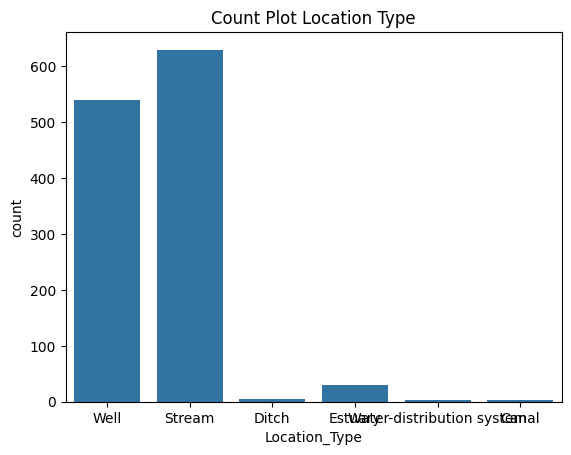

In [95]:
#df1_group=df1_drop2.groupby(['Location_Type']) # i have no idea how to see what the groupby function is doing to the data and how to work with the modified data frame
#creating a bar plot that purely counts the frequency of each location sampling type
sns.countplot(x='Location_Type', data=df1_drop2)
plt.title("Count Plot Location Type")
plt.show()

In [109]:
df1_dblgrpd= df1_drop2.groupby(['Activity_StartDate', "Location_Type"]).count() #new data frame where we grouped by location type and start date
print(df1_dblgrpd)
#slice out new data frames that contain only one location type
# df1_dblgrpd[df1_dblgrpd['Location_Type']== 'Stream']


#df1_drop2=df1_drop2['Location_Type'].replace({'Well' : '1', 'Stream' : '2', 'Ditch': '3', 'Estuary': '4', 'Water- distribution system': "5", 'Canal': '6'})
#print(df1_drop2.shape)

                                  Org_Identifier  Org_FormalName  \
Activity_StartDate Location_Type                                   
1971-10-29         Stream                      1               1   
1972-06-12         Stream                      1               1   
1972-06-13         Stream                      7               7   
1972-06-14         Stream                      1               1   
1972-06-15         Stream                      2               2   
...                                          ...             ...   
2010-08-23         Stream                      1               1   
2011-08-22         Stream                      1               1   
2014-08-25         Stream                      1               1   
2017-06-08         Canal                       1               1   
2017-06-14         Canal                       1               1   

                                  Project_Identifier  Location_Identifier  \
Activity_StartDate Location_Type      